# Sales Prediction
we will build a model to predict sales.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cluster import DBSCAN
import joblib # for save model

# Data Preprocessing

In [2]:
_data = pd.read_csv('./RoS_train.csv')
_data.head()

,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year
0,5571,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
1,6714,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
2,5371,519,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
3,4257,449,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,15
4,4209,447,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,6,15


In [3]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168607 entries, 0 to 168606
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      168607 non-null  int64  
 1   Customers                  168607 non-null  int64  
 2   Open                       168607 non-null  int64  
 3   Promo                      168607 non-null  int64  
 4   StateHoliday               168607 non-null  object 
 5   SchoolHoliday              168607 non-null  int64  
 6   StoreType                  168607 non-null  object 
 7   Assortment                 168607 non-null  object 
 8   CompetitionDistance        168179 non-null  float64
 9   CompetitionOpenSinceMonth  114961 non-null  float64
 10  CompetitionOpenSinceYear   114961 non-null  float64
 11  Promo2                     168607 non-null  int64  
 12  Promo2SinceWeek            83808 non-null   float64
 13  Promo2SinceYear            83

Sales is the target variable we want to predict.
columns that need to be checked for missing values are: 
* StateHoliday
* CompetitionDistance
* CompetitionOpenSinceMonth
* CompetitionOpenSinceYear
* Promo2SinceWeek
* Promo2SinceYear
* PromoInterval

In [4]:
for col in _data.columns:
    print(col)
    print(f"unique values count: {_data[col].unique().size}")
    print(_data[col].unique())
    print()

Sales
unique values count: 17585
[ 5571  6714  5371 ... 18325 23694 24043]

Customers
unique values count: 3238
[ 560  612  519 ... 3944 2709 2874]

Open
unique values count: 1
[1]

Promo
unique values count: 2
[1 0]

StateHoliday
unique values count: 4
['0' 'a' 'b' 'c']

SchoolHoliday
unique values count: 2
[1 0]

StoreType
unique values count: 4
['c' 'a' 'd' 'b']

Assortment
unique values count: 3
['a' 'c' 'b']

CompetitionDistance
unique values count: 655
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03

In [5]:
_data.describe()

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,month,year
count,168607.000000,168607.000000,168607.0,168607.000000,168607.000000,168179.000000,114961.000000,114961.000000,168607.000000,83808.000000,83808.000000,168607.000000,168607.000000
mean,7720.344547,763.247244,1.0,0.447081,0.193634,5452.959823,7.233845,2008.710563,0.497061,23.264533,2011.753377,5.855522,13.830737
std,3432.319164,401.002459,0.0,0.497193,0.395146,7822.034528,3.208495,5.965996,0.499993,14.092297,1.663020,3.327141,0.777344
min,326.000000,40.000000,1.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,13.000000
25%,5417.000000,520.000000,1.0,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,3.000000,13.000000
50%,7078.000000,678.000000,1.0,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,6.000000,14.000000
75%,9235.000000,893.000000,1.0,1.000000,0.000000,6880.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,8.000000,14.000000
max,43559.000000,5192.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,12.000000,15.000000


In [6]:
print("Percentage of missing values in each column:\n", 40*'-')
print(((_data.isna().sum() / _data.shape[0]) * 100).sort_values(ascending=False))

Percentage of missing values in each column:
 ----------------------------------------
Promo2SinceYear              50.293879
Promo2SinceWeek              50.293879
PromoInterval                50.293879
CompetitionOpenSinceYear     31.817184
CompetitionOpenSinceMonth    31.817184
CompetitionDistance           0.253845
Sales                         0.000000
Promo                         0.000000
Customers                     0.000000
Assortment                    0.000000
StoreType                     0.000000
SchoolHoliday                 0.000000
StateHoliday                  0.000000
Open                          0.000000
Promo2                        0.000000
month                         0.000000
year                          0.000000
dtype: float64


In [7]:
print(f"""
    Promo2 not avilable percentage: {len(_data.loc[_data.Promo2==0, 'Promo2'])/len(_data['Promo2']) * 100}
    """)

print(f"""
    competition hasn't percentage: {_data['CompetitionDistance'].isna().sum()/len(_data['CompetitionDistance']) * 100}
    """)


    Promo2 not avilable percentage: 50.29387866458688
    

    competition hasn't percentage: 0.2538447395422491
    


we will remove these columns:
* Promo2SinceYear
* Promo2SinceWeek
* PromoInterval
* CompetitionOpenSinceYear
* CompetitionOpenSinceMonth

no no, we won't remove thus informations, beacuse they have real realationship with main column data proccess


## Data Clean

In [8]:
clean_data = _data.copy().drop('Open', axis=1)

clean_data.loc[clean_data.Promo2==0, ['Promo2SinceYear', 'Promo2SinceWeek']] = 0
clean_data.loc[clean_data.Promo2==0, 'PromoInterval'] = 'None'

In [9]:
cdn_condition = clean_data.CompetitionDistance.isna()
clean_data.loc[cdn_condition, "HasCompetition"] = 0
clean_data.loc[~cdn_condition, "HasCompetition"] = 1
clean_data["HasCompetition"] = clean_data["HasCompetition"].astype("category")

Identify Categorical column:
* Promo
* StateHoliday
* SchoolHoliday
* StoreType
* Assortment
* Promo2
* PromoInterval
* month
* CompetitionOpenSinceYear
* CompetitionOpenSinceMonth
* Promo2SinceYear
* year


lowering data scale (numeric datas):
* Promo2SinceWeek: int8
* CompetitionDistance: int32
* Customers: int16
* Sales: int32


### Type Optimazation

In [10]:
clean_data[
    [
        "Promo",
        "StateHoliday",
        "SchoolHoliday",
        "StoreType",
        "Assortment",
        "Promo2",
        "PromoInterval",
        "month",
        "CompetitionOpenSinceMonth",
        "Promo2SinceYear",
        "year",
    ]
] = clean_data[
    [
        "Promo",
        "StateHoliday",
        "SchoolHoliday",
        "StoreType",
        "Assortment",
        "Promo2",
        "PromoInterval",
        "month",
        "CompetitionOpenSinceMonth",
        "Promo2SinceYear",
        "year",
    ]
].astype(
    "category"
)

clean_data["Sales"] = clean_data["Sales"].astype("Float32")
clean_data["CompetitionOpenSinceYear"] = clean_data["CompetitionOpenSinceYear"].astype("Float32")
clean_data["CompetitionDistance"] = clean_data["CompetitionDistance"].astype("Float32")
clean_data["Promo2SinceWeek"] = clean_data["Promo2SinceWeek"].astype("Float32")
clean_data["Customers"] = clean_data["Customers"].astype("Float32")

In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168607 entries, 0 to 168606
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Sales                      168607 non-null  Float32 
 1   Customers                  168607 non-null  Float32 
 2   Promo                      168607 non-null  category
 3   StateHoliday               168607 non-null  category
 4   SchoolHoliday              168607 non-null  category
 5   StoreType                  168607 non-null  category
 6   Assortment                 168607 non-null  category
 7   CompetitionDistance        168179 non-null  Float32 
 8   CompetitionOpenSinceMonth  114961 non-null  category
 9   CompetitionOpenSinceYear   114961 non-null  Float32 
 10  Promo2                     168607 non-null  category
 11  Promo2SinceWeek            168607 non-null  Float32 
 12  Promo2SinceYear            168607 non-null  category
 13  PromoInterval 

In [12]:
clean_data.loc[clean_data.duplicated()].size
# ok!

0

In [13]:
print(f"Percent of nullable values: {(clean_data.isnull().any(axis=1).sum() / len(clean_data)) * 100: .2f}%")

Percent of nullable values:  31.82%


In [14]:
missing_counts = clean_data.isnull().sum()
print(missing_counts[missing_counts > 0].sort_values(ascending=False))

CompetitionOpenSinceMonth    53646
CompetitionOpenSinceYear     53646
CompetitionDistance            428
dtype: int64


Does not having a competitor have anything to do with the corresponding values ​​being null?

In [15]:
print(
    clean_data.loc[
        clean_data["HasCompetition"] == 0 & clean_data.isnull()["CompetitionDistance"]
    ].shape[0]
)

print(
    clean_data.loc[
        clean_data["HasCompetition"] == 0 & clean_data.isnull()["CompetitionOpenSinceMonth"]
    ].shape[0]
)

428
428


Actually! yes! all of them have not competition.

well, how about CompetitionDistance and CompetitionOpenSinceMonth?

In [16]:
print(
    clean_data.loc[
        clean_data.isnull()["CompetitionDistance"]
        & clean_data.isnull()["CompetitionOpenSinceMonth"]
    ].shape[0]
)

428


yes! all of them!

and but, what about thus 53646-428 null values?

In [17]:
print(
    clean_data.loc[
        clean_data["HasCompetition"] == 1
        & clean_data.isnull()["CompetitionOpenSinceMonth"]
    ].shape[0]
)

53218


all of them are real missing value

In [18]:
clean_data.loc[clean_data['HasCompetition'] == 0, 'CompetitionDistance'] = -1

review your code

In [19]:
clean_data.describe()

,Sales,Customers,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek
count,168607.0,168607.0,168607.0,114961.0,168607.0
mean,7720.344727,763.247253,5439.114746,2008.710327,11.563897
std,3432.319336,401.002441,7816.919434,5.965995,15.297647
min,326.0,40.0,-1.0,1900.0,0.0
25%,5417.0,520.0,710.0,2006.0,0.0
50%,7078.0,678.0,2320.0,2010.0,0.0
75%,9235.0,893.0,6870.0,2013.0,22.0
max,43559.0,5192.0,75860.0,2015.0,50.0


In [20]:
clean_data.head()

,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,HasCompetition
0,5571.0,560.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,7,15,1.0
1,6714.0,612.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,7,15,1.0
2,5371.0,519.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,7,15,1.0
3,4257.0,449.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,7,15,1.0
4,4209.0,447.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,6,15,1.0


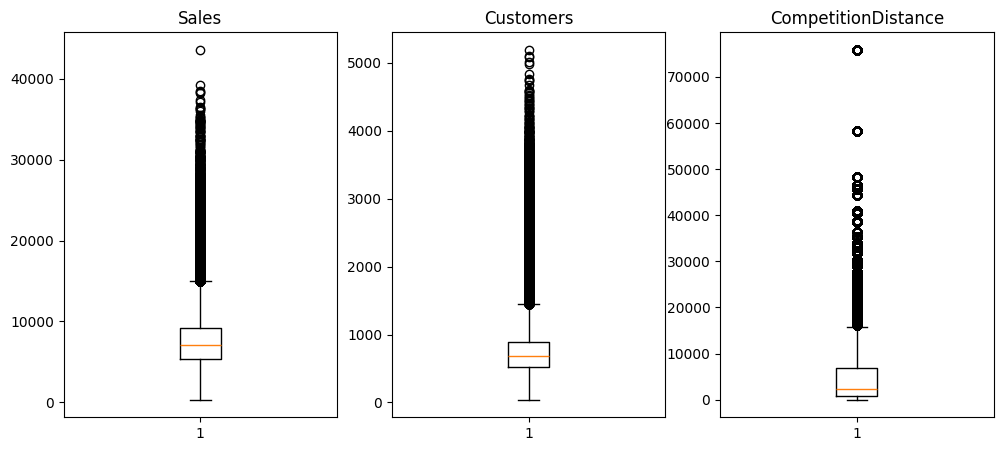

In [21]:
# Sales, Customers, CopetitionDistance, 

fig, axes = plt.subplots(1,3, figsize=(12,5))
axes[0].set_title('Sales')
axes[0].boxplot(clean_data['Sales'])

axes[1].set_title('Customers')
axes[1].boxplot(clean_data['Customers'])

axes[2].set_title('CompetitionDistance')
axes[2].boxplot(clean_data['CompetitionDistance'])
plt.show()

### Encoding Data

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Label Encoding
label_encodes = {
    "PromoInterval": LabelEncoder().fit(clean_data["PromoInterval"]),
    "StoreType": LabelEncoder().fit(clean_data["StoreType"]),
    "Assortment": LabelEncoder().fit(clean_data["Assortment"]),
    "StateHoliday": LabelEncoder().fit(clean_data["StateHoliday"]),
}

for col, le in label_encodes.items():
    clean_data[col] = le.transform(clean_data[col])
    print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Feb,May,Aug,Nov': np.int64(0), 'Jan,Apr,Jul,Oct': np.int64(1), 'Mar,Jun,Sept,Dec': np.int64(2), 'None': np.int64(3)}
{'a': np.int64(0), 'b': np.int64(1), 'c': np.int64(2), 'd': np.int64(3)}
{'a': np.int64(0), 'b': np.int64(1), 'c': np.int64(2)}
{'0': np.int64(0), 'a': np.int64(1), 'b': np.int64(2), 'c': np.int64(3)}


In [23]:
clean_data_filled = clean_data.sample(n=5000, random_state=42)
_cols = clean_data_filled.select_dtypes(include="category").columns
for col in _cols:
    clean_data_filled[col] = clean_data_filled[col].astype("Float32")
clean_data_filled = clean_data_filled.fillna(-1)

clean_data_filled = RobustScaler().fit_transform(clean_data_filled)
# Normalization: using standardscaler can be a problem if the data contains outliers

we need to feature engineer our dataset to improve model performance. This includes creating new features, transforming existing ones, and selecting the most relevant features for our model.

why? because my DBSCAN model can kill my system when i have many features! (^_*)

#### PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(clean_data_filled)
print(pca.explained_variance_ratio_.cumsum())

_top_components = pca.components_[:8]
# اعمال کاهش ابعاد با ضرب ماتریسی
_reduced_data = np.dot(clean_data_filled - pca.mean_, _top_components.T)

[0.27978351 0.52160391 0.65277873 0.74327501 0.79721061 0.84668748
 0.88448127 0.91701606 0.93928292 0.95925132 0.97821657 0.99013977
 0.99524988 0.99949798 0.99976092 0.99999998 1.        ]


In [31]:
_reduced_data.shape

(5000, 8)

9


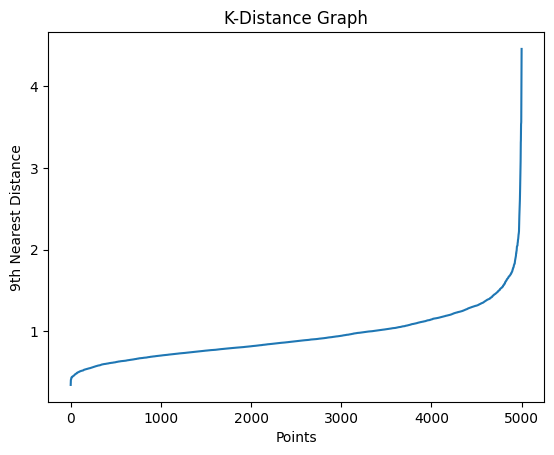

In [51]:
from sklearn.neighbors import NearestNeighbors

count_samples = _reduced_data.shape[1] + 1
print(count_samples)

neighbors_fit = NearestNeighbors(n_neighbors=count_samples).fit(_reduced_data)
distances, indices = neighbors_fit.kneighbors(_reduced_data)

# مرتب‌سازی فاصله‌ها
distances = np.sort(distances[:, count_samples - 1])
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel(f"{count_samples}th Nearest Distance")
plt.title("K-Distance Graph")
plt.show()

In [53]:
from kneed import KneeLocator
eps_value_index = KneeLocator(
    range(len(distances)),  # محور x
    distances,              # محور y
    curve="convex",         # چون نمودار صعودیه
    direction="increasing"  # چون فاصله‌ها زیاد می‌شن
).knee

distances[eps_value_index]

np.float64(1.9552810693565377)

In [66]:
dbscan = DBSCAN(eps=distances[eps_value_index], min_samples=3).fit(_reduced_data)
np.unique(dbscan.labels_)

array([-1,  0,  1])